In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Activation
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import pylab as plt

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

timestep = 40
seq = 129

trainData = trainD.reshape((trainD.shape[0], timestep, seq))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], timestep, seq))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], timestep, seq))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 30, 300)
Train Label:  (5078, 4)
Vali Data:  (2032, 30, 300)
Vali Label:  (2032, 4)
Test Data:  (3041, 30, 300)
Test Label:  (3041, 4)


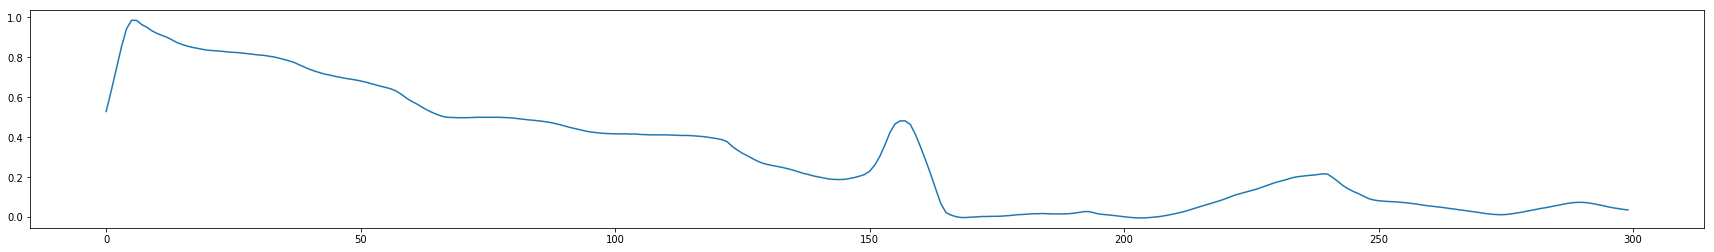

In [2]:
plt.figure(figsize=(30,4))
plt.plot(trainData[1000][0])
plt.show()

In [38]:
tmpD = trainData[1000][0]
tmpD.shape = (1,300)
print(tmpD.shape)

(1, 300)


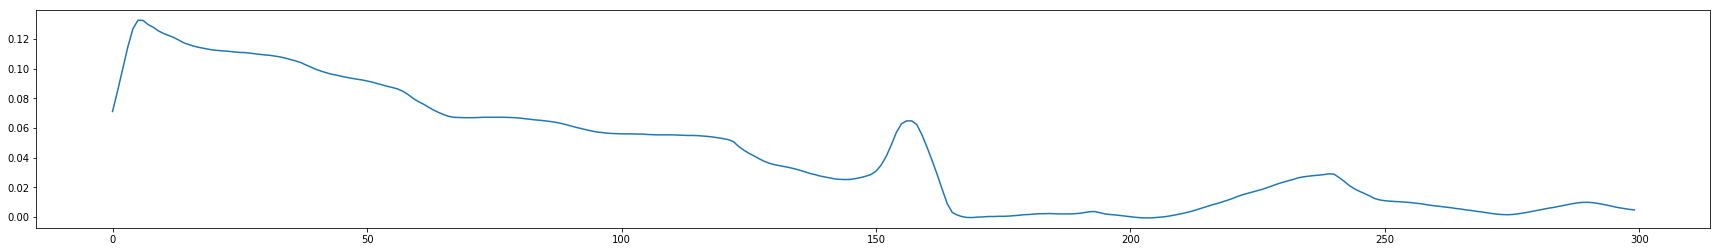

In [39]:
from sklearn.preprocessing import normalize
tdd = normalize(tmpD)
# tdd= scaler.fit_transform(tmpD)
# for i in range(len(validationData)):
#     validationData[i] = scaler.fit_transform(validationData[i])
# for i in range(len(testData)):
#     testData[i]  = scaler.fit_transform(testData[i])
# print(tdd)
plt.figure(figsize=(30,4))
plt.plot(tdd[0])
plt.show()

In [3]:
print(trainData[103][0])

[ 0.105  0.105  0.104  0.103  0.102  0.1    0.099  0.097  0.093  0.084
  0.078  0.071  0.064  0.061  0.057  0.054  0.054  0.06   0.066  0.072
  0.071  0.062  0.037 -0.012 -0.084 -0.175 -0.28  -0.395 -0.5   -0.579
 -0.61  -0.605 -0.548 -0.436 -0.285 -0.114  0.062  0.227  0.366  0.472
  0.559  0.627  0.663  0.677  0.677  0.667  0.641  0.605  0.562  0.507
  0.443  0.374  0.314  0.268  0.229  0.194  0.168  0.159  0.155  0.153
  0.151  0.15   0.149  0.149  0.149  0.149  0.148  0.149  0.15   0.153
  0.155  0.157  0.159  0.162  0.166  0.166  0.162  0.157  0.153  0.147
  0.142  0.138  0.133  0.118  0.093  0.079  0.063  0.05   0.038  0.025
  0.01   0.    -0.003 -0.005 -0.006 -0.007 -0.008 -0.007 -0.005 -0.002
  0.001  0.006  0.013  0.021  0.03   0.043  0.062  0.081  0.096  0.104
  0.109  0.114  0.118  0.123  0.128  0.127  0.12   0.115  0.111  0.108
  0.107  0.106  0.108  0.111  0.115  0.12   0.128  0.132  0.135  0.137
  0.138  0.135  0.128  0.122  0.115  0.11   0.107  0.106  0.104  0.103
  0.10

In [4]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (timestep, seq)))
model.add(LSTM(100))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(4, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 100)           160400    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 204       
Total params: 256,154
Trainable params: 256,154
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
adam = Adam(lr = 0.001)
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=30,
                          validation_data=(validationData, validationLabel),
                          batch_size=100,
                          )

Train on 5078 samples, validate on 2032 samples
Epoch 1/30
5078/5078 [==============================] - 8s 2ms/step - loss: 1.0519 - acc: 0.5727 - val_loss: 0.9561 - val_acc: 0.5881
Epoch 2/30
5078/5078 [==============================] - 7s 1ms/step - loss: 0.9242 - acc: 0.5949 - val_loss: 0.9385 - val_acc: 0.5989
Epoch 3/30
5078/5078 [==============================] - 7s 1ms/step - loss: 0.8902 - acc: 0.6130 - val_loss: 0.9229 - val_acc: 0.5940
Epoch 4/30
5078/5078 [==============================] - 7s 1ms/step - loss: 0.8554 - acc: 0.6276 - val_loss: 0.9136 - val_acc: 0.6107
Epoch 5/30
5078/5078 [==============================] - 7s 1ms/step - loss: 0.8386 - acc: 0.6438 - val_loss: 0.9036 - val_acc: 0.6093
Epoch 6/30
5078/5078 [==============================] - 8s 1ms/step - loss: 0.7941 - acc: 0.6640 - val_loss: 0.9062 - val_acc: 0.6097
Epoch 7/30
5078/5078 [==============================] - 7s 1ms/step - loss: 0.7504 - acc: 0.6853 - val_loss: 0.9725 - val_acc: 0.6009
Epoch 8/30
507

KeyboardInterrupt: 

In [15]:
from keras import backend as K
import pprint
np.set_printoptions(suppress=True)

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

test = np.random.random((trainData.shape[1], trainData.shape[2]))[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
pprint.pprint(layer_outs)

[[array([[[-0.22414054,  0.52508575, -0.6934764 ,  0.10182019,
         -0.        , -0.04305241, -0.1400179 , -0.03924071],
        [-0.27860743,  0.8945344 , -0.7647376 ,  0.08659997,
         -0.        ,  0.02511748, -0.0874846 , -0.11993892],
        [-0.35990155,  0.9787704 , -0.70617604,  0.18954171,
         -0.        , -0.01408337, -0.21158743, -0.160188  ],
        [-0.4644204 ,  0.99599373, -0.70645773,  0.2784295 ,
         -0.        , -0.04505518, -0.14660996, -0.12885842],
        [-0.5254848 ,  0.9565187 , -0.7039776 ,  0.30437887,
         -0.        ,  0.03205794, -0.11707899, -0.13873613],
        [-0.5464126 ,  0.8833253 , -0.7544265 ,  0.3123896 ,
         -0.        , -0.00882981, -0.11735194, -0.11180482],
        [-0.6241511 ,  0.94703597, -0.84391195,  0.36168885,
         -0.        , -0.0294298 , -0.14732341, -0.10561521],
        [-0.44692656,  0.98213327, -0.71774405,  0.38936064,
         -0.        , -0.01652243, -0.15081894, -0.13600826],
        [-0.53

In [4]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

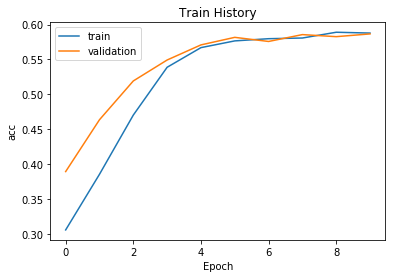

In [5]:
show_plot('acc', train_history)

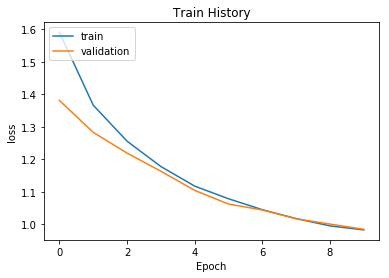

In [6]:
show_plot('loss', train_history)

### Test Spectrogram

In [1]:
import numpy as np
from scipy.misc import imsave
trainD = np.load("/home/hsiehch/30s/train_data.npy")

In [2]:
trainD.shape

(5078, 9000)

In [2]:
from scipy.signal import spectrogram
import pylab as plt
freqs, times, Sx = spectrogram(trainD[1], fs=300, nperseg=256, noverlap=128, scaling='spectrum', detrend=False, window='hanning')
fig = plt.figure()
plt.pcolormesh(times, freqs/1000, np.log10(Sx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<Figure size 640x480 with 1 Axes>

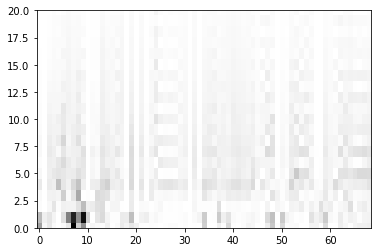

In [18]:
plt.ylim(0,20)
plt.imshow(Sx, aspect='auto', cmap='binary', origin='lower')

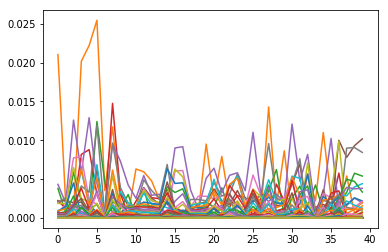

In [7]:
plt.plot(np.transpose(Sx))
plt.show()

In [6]:
plt.imsave('%s.png' % 't', np.log10(Sx))

In [5]:
imsave('try.png', np.log10(Sx))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
np.set_printoptions(suppress=True)
print (Sx)
print('-----------------')
print (np.log10(Sx))
# np.transpose(Sx)

[[0.02778014 0.00233987 0.00720675 ... 0.00445793 0.00459787 0.00510757]
 [0.02000796 0.00487826 0.00771269 ... 0.00088201 0.00336824 0.00356005]
 [0.00133419 0.00010087 0.00238787 ... 0.00396745 0.00529275 0.00279007]
 ...
 [0.         0.         0.         ... 0.         0.         0.00000001]
 [0.         0.         0.         ... 0.         0.00000001 0.        ]
 [0.         0.         0.         ... 0.00000001 0.         0.        ]]
-----------------
[[ -1.55626551  -2.63080787  -2.14226052 ...  -2.35086693  -2.33744291
   -2.2917859 ]
 [ -1.69879718  -2.31173544  -2.11279401 ...  -3.05452733  -2.47259637
   -2.44854336]
 [ -2.87478377  -3.99625658  -2.62198947 ...  -2.4014888   -2.27631898
   -2.55438541]
 ...
 [ -8.39323731  -9.81664498  -8.35884076 ...  -8.38614833  -9.05587588
   -8.00978092]
 [ -8.81692061  -9.49513627  -8.38738005 ...  -8.61012175  -8.0772884
   -8.36894563]
 [ -8.6394978  -10.2030091   -9.29167828 ...  -8.27733467  -9.21591047
   -8.31195326]]


In [21]:
Sx.shape

(129, 69)

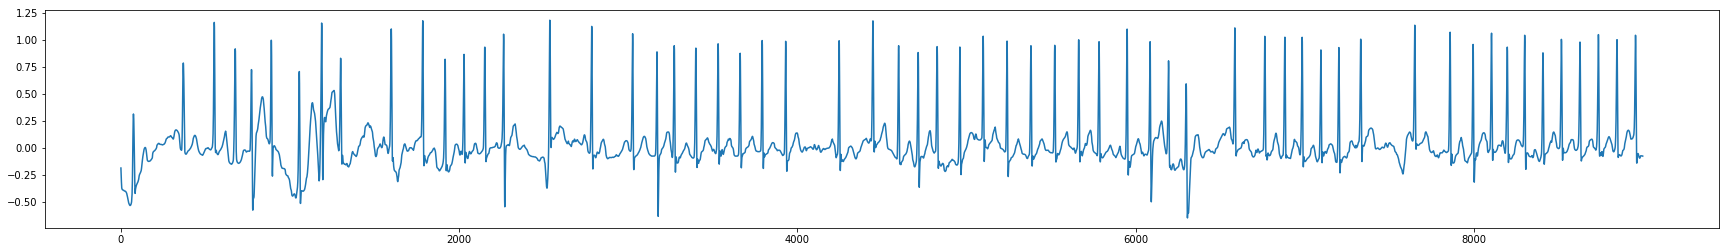

In [6]:
plt.figure(figsize=(30,4))
plt.plot(trainD[1])
plt.show()